In [27]:
import pandas as pd

# loading data
data = pd.read_csv('outputs/evaluation_output.csv')
data['run'] = 1
n_runs = 10
n_nodes = 11

for i in range(1,n_runs):
    temp = pd.read_csv('outputs/evaluation_output_{}.csv'.format(i))
    temp['run'] = i+1
    data = data.append(temp)

display(data)

,nodeId,roundId,good,seqNum,active,light,value,readyOut,run
0,10,12,False,139,True,False,0,0,1
1,11,12,True,117,False,False,0,0,1
2,6,12,False,139,True,False,0,0,1
3,1,12,False,139,True,False,0,0,1
4,3,12,False,139,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...
6,5,12,False,139,True,False,0,0,10
7,6,12,False,139,True,False,0,0,10
8,10,12,False,139,True,False,0,0,10
9,1,12,False,139,True,False,0,0,10


In [29]:
counts = pd.DataFrame(range(n_runs), columns=['run'])
# counting number of messages sent by good and bad nodes
message_counts = data.groupby(['run', 'good'])['seqNum'].sum().reset_index()
counts['count_bad'] = message_counts[message_counts['good'] == False]['seqNum'].values
counts['count_good'] = message_counts[message_counts['good'] == True]['seqNum'].values

display(counts)

,run,count_bad,count_good
0,0,1390,117
1,1,1390,117
2,2,1390,117
3,3,1500,150
4,4,1390,117
5,5,1390,117
6,6,1390,117
7,7,1500,150
8,8,1500,150
9,9,1390,117


In [30]:
import numpy as np

O = []

# Compute the complexity limit for number of messages sent
for run in counts:
    T = min(n_nodes^2, message_count_bad_nodes)
    O.append((T+n_nodes)*np.log(n_nodes))
    
print(O)

KeyError: 'good'

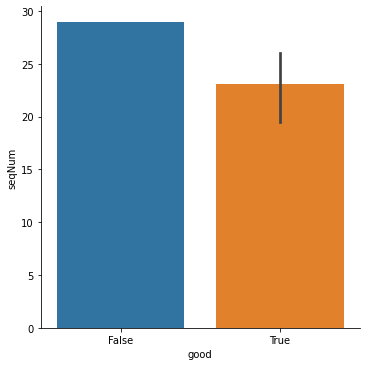

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='good', y='seqNum', kind='bar', data=data)
plt.ylim(0)

plt.show()

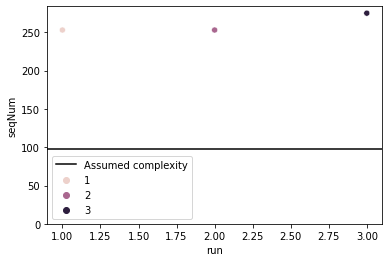

In [149]:
sns.scatterplot(x='run', y='seqNum', data=counts.groupby('run').sum().reset_index(), hue='run')
plt.axhline(O[0], color='k', label='Assumed complexity')
plt.ylim(0)
plt.legend()
plt.show()

In [45]:
from scipy import stats

stats.ttest_ind(message_counts_good, message_counts_bad)

Ttest_indResult(statistic=inf, pvalue=0.0)